# CS2006 Advanced Programming Projects

## Python - Group Project 2

## Data analysis with pandas

In [1]:
import pandas as pd
import sys 
import os

sys.path.append("../code")

import consistency

We start with exploring the content of the dataset.

In [2]:
df = pd.read_csv("../data/census2011.csv")
df

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569736,7946020,W92000004,H,1,1,1,5,1,2,1,4,1,9,1,8,8,3,3
569737,7944310,W92000004,H,3,1,1,3,1,2,1,2,1,1,1,7,4,3,4
569738,7945374,W92000004,H,3,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,-9
569739,7944768,W92000004,H,1,1,2,8,5,2,1,3,1,9,5,9,2,-9,4


## Cleaning and verification of data ##
We check that the data frame matches the expected data form and fix any issues.

In [3]:
consistency.cleanDataFrame(df)

Checking for problem values...
Value checking finished.
Checking types...
Discrepancy of type in column  Residence Type expected string found object
Type checking finished.
Retyping columns ['Residence Type'] ...
Retyping Residence Type from <class 'str'> to string
Retyping finished


,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569736,7946020,W92000004,H,1,1,1,5,1,2,1,4,1,9,1,8,8,3,3
569737,7944310,W92000004,H,3,1,1,3,1,2,1,2,1,1,1,7,4,3,4
569738,7945374,W92000004,H,3,1,1,1,1,1,1,1,1,2,-9,-9,-9,-9,-9
569739,7944768,W92000004,H,1,1,2,8,5,2,1,3,1,9,5,9,2,-9,4


In [4]:
df["Residence Type"]

0         H
1         H
2         H
3         H
4         H
         ..
569736    H
569737    H
569738    H
569739    H
569740    H
Name: Residence Type, Length: 569741, dtype: string

## Save cleaned data ##
Save the cleaned data to a separate file so we can reuse it later.

In [5]:
df.to_csv("../data/census2011-clean.csv")

# Design
Initially, we simply enumerated the possible values of each column and tested
each column.
This was a very simplistic approach, and allowed us to rapidly evaluate 
the quality of the data.
By first doing a quick analysis of the data, we were able to make an informed
decision of how to handle invalid data.
Since there were no invalid values we decided that future datasets would be
unlikely to have a large amount of invalid data, and so we decided to
remove any invalid rows from the data set.
If there were a large number of invalid rows, this could cause issues as the
sample used for analysis may not be fully representative of the original data,
and could lead us to draw invalid conclusions.


We wanted to make cleaning and verification data extensible to other data sets,
but our current way would need to be completely rewritten for a new data set
with new columns. Therefore, we developed `OptionEnum`, that extends `Enum`,
and stores a mapping of key to description. We can now easily work with the
data set, listing all possible values with their descriptions as well as parsing.

In [6]:
import MicroDataTeachingVars as md
[f"{x.key()}: {x.desc()}" for x in md.EthnicityOptions]

['1: White',
 '2: Mixed',
 '3: Asian or Asian British',
 '4: Black or Black British',
 '5: Chinese or Other ethnic group',
 '-9: No code required (Not resident in england or wales, students or schoolchildren living away during term-time)']

We can also use this to easily search for a particular value in the dataset


In [7]:
df.loc[df["Age"] == md.AgeOptions.FROM_35_TO_44.key()]

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
6,7394871,E12000001,H,5,1,2,4,3,2,1,2,1,1,1,6,11,2,3
18,7395059,E12000001,H,1,1,1,4,1,2,1,3,1,1,1,8,2,3,4
22,7394857,E12000001,H,2,1,1,4,2,2,1,1,1,1,1,8,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569685,7944687,W92000004,H,2,1,1,4,1,2,1,2,1,2,1,8,4,3,4
569693,7945171,W92000004,H,2,1,2,4,2,2,1,1,1,2,1,4,4,2,2
569706,7946284,W92000004,H,1,1,2,4,1,2,1,1,1,3,1,3,11,3,2
569725,7945073,W92000004,H,1,1,2,4,1,2,1,1,1,2,1,4,11,3,2


And easily translate the cryptic key names into the descriptive strings

In [8]:
df["Residence Type"].replace(md.ResidenceOptions.mappings)

0         Not resident in a communal establishment
1         Not resident in a communal establishment
2         Not resident in a communal establishment
3         Not resident in a communal establishment
4         Not resident in a communal establishment
                            ...                   
569736    Not resident in a communal establishment
569737    Not resident in a communal establishment
569738    Not resident in a communal establishment
569739    Not resident in a communal establishment
569740    Not resident in a communal establishment
Name: Residence Type, Length: 569741, dtype: string

# Descriptive analysis of Data #

In [9]:
import stats as s
s.printSummary(df)

Number of Records: 569741
Column types-----------
Region                               object
Residence Type               string[python]
Family Composition                    int64
Population Base                       int64
Sex                                   int64
Age                                   int64
Marital Status                        int64
Student                               int64
Country of Birth                      int64
Health                                int64
Ethnic Group                          int64
Religion                              int64
Economic Activity                     int64
Occupation                            int64
Industry                              int64
Hours worked per week                 int64
Approximated Social Grade             int64
dtype: object
-----------
Residence Type
H    559087
C     10654
Name: count, dtype: Int64
-----------
Family Composition
 2    300962
 1     96690
 3     72641
 5     64519
-9     18851
 4      9848
 6

# Performance Analysis and Optimisation
One of the Hard requirements was to analyse the performance of different steps of our analysis.
To do this I used the timeit library and created performance tests over a range of data set sizes.

I identified two problematic steps: **validation** and **parsing**.

## Benchmarking with timeit ##
In order to compare the optimised and unoptimised steps of the data analysis,
I used the built in [timeit](https://docs.python.org/3/library/timeit.html)
library in python along with the census data already provided.
I ran the steps on different numbers of rows from the data set, 
ranging from 10 rows to 400000. 
This allowed me not only to see whether the algorithm had sped up, 
but predict how it would behave on even larger data sets that our 
code could be used for in future.

In order to make increase the reliability of the results, I run the steps
multiple times. I run the unoptimised variants 3 times, and the optimised
variants 10 times, due to the large disparity in time taken to run each.

### Validation ###
The validation step is the step that checks that the entire data frame for any
invalid data, and reports rows that are invalid. This was immediately observed
as being slow from when the validation code was first made.

Our original implementation used the naive approach of iterating through the
data frame, and checking that the encoded was one of the permitted values.

Experimenting with pandas, I found the method `Series.isin(values)`, which 
produces a new series with True/False values of whether each value was in 
the given set of values. I changed the method to use this which also allowed
us to easily see which row numbers contained the problematic values.

When I changed to this I immediately saw a huge performance improvement, which
I later benchmarked (see below).

### Parsing ###
The parsing step is the step that converted the encoded data into the long
human readable descriptions. As I learned from the previous step that
pandas is much faster than iteration, I used `Series.apply(func)` to apply
a mapping function that parsed each value. However, this was still not very
fast, and although it was unlikely to ever be used on the whole data frame,
it was still slow on subsets.

I tried multiple different approaches, such as using a dictionary inside the
parsing function, but this only improved the performance marginally.
After lots of experimentation, I wondered whether the .apply() in pandas
was not the best way to perform the transformation. I discovered that there
was indeed a method to elimate this, `.replace()`, which takes a dictionary
that maps from the key to a value. By using this I was able to see
a massive performance improvement.

### Running the benchmarks ###
To run the benchmarks, the script `./run_performance` can be used, which
will generate graphs in the `images/performance` directory.

The benchmark can also be run below - normally it would be a bad idea to
run benchmarks in a Jupyter notebook, but in this case the performance
difference is so extreme that it should overshadow any noise.

10 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
100 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
500 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
1000 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
5000 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
10000 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
50000 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
100000 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
400000 Rows: Simple Iteration... Current implementation... Parse df list... Parse df dict... 
Saved validation.png
Saved parse.png
== Validation Results ==
Simple iteration: (10: 0.00023598), (100: 0.00047053), (500: 0.0015563), (1000: 0.0030843), (5000: 0.014712)

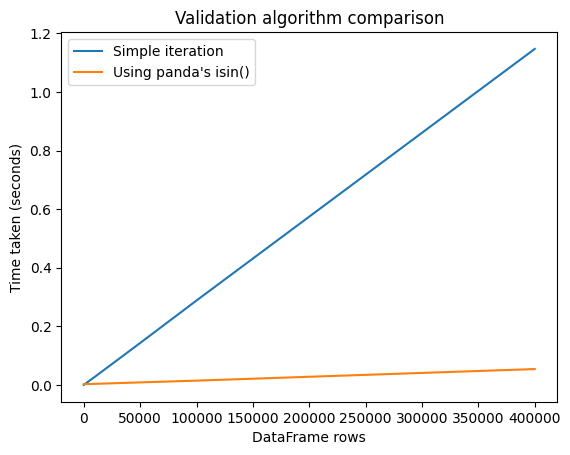

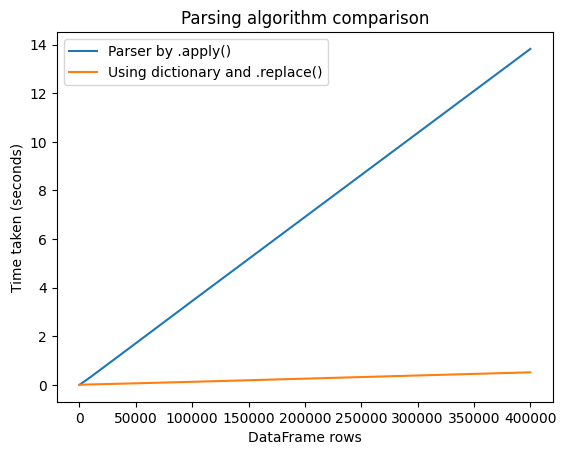

In [10]:
%matplotlib inline

import performance
performance.profile_and_plot(df)

## Benchmarking Results ##

### Validation ###
We can clearly see that the pandas' `isin()` method massively outperforms
iteration.
At 400000 rows, `isin()` is **over 20x faster**: 0.044s vs 1.045s.

From the graph it appears this is only a constant improvement - both algorithms
seem to have O(n) complexity, which means that with a large enough data set,
the validation step could still take a long time. 
With our dataset however, it goes from being slightly slow to immediate,
which is a much appreciated improvement.

### Parsing ###
The results from the parsing step is similar to the validation step.
The `.replace()` method massively outperforms `.apply()`.
At 400000 rows, `.replace()` is over 25x faster (0.49s vs 13.7s)

Again, the complexity of both algorithms seems to be the same - O(n).

### Lessons and Recommendations ###
The main recommendations from this experience is to
- Use panda's built-in methods whenever possible
- Prefer passing primitives (i.e. lists, sets) instead of functions

I believe the reason for this is that pandas is based on [numpy](https://numpy.org/).
Numpy is designed to perform operations on multiple columns at the same time,
and is partly written in C. Therefore, in order to access the best performance
we need to pass arguments that can be easily translated into C, such as the
primitives in python. This then allows pandas to use numpy effectively,
without having to repeatedly cross the C barrier.

This article discusses the issue slightly:
https://labs.quansight.org/blog/unlocking-c-level-performance-in-df-apply